# Problema de Classificação

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn import tree
from sklearn.metrics import accuracy_score as accuracy

In [2]:
dataBase = pd.read_csv('./dados/Celular.csv')
dataBase.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


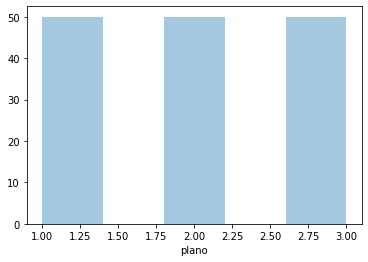

In [3]:
sns.distplot(dataBase['plano'], bins=5, kde=False)

**Como na imagem acima vemos que temos 50 pessoas por planos ou seja 3 tipos de classificação**

### Criando o vetor

In [4]:
x = dataBase.iloc[:,:-1].values  # vetorizar todas as colunas menos a última
y = dataBase.iloc[:,4].values  # vetorizar a última coluna label

**Outra forma**

In [5]:
features = np.array(dataBase[['salario', 'economias', 'idade', 'dividas']]) # vetorizar todas as colunas menos a última
label = np.array(dataBase['plano']) # vetorizar a última coluna label

### Separando base Traino é teste

In [6]:
features_train, features_test, label_train, label_test = split(features, label, test_size=0.3)

### Modelo

In [7]:
clf = tree.DecisionTreeClassifier()

In [8]:
clf.fit(features_train, label_train)

DecisionTreeClassifier()

[Text(133.92000000000002, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [34, 38, 33]'),
 Text(66.96000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 170.84571428571428, 'X[3] <= 1.75\ngini = 0.498\nsamples = 71\nvalue = [0, 38, 33]'),
 Text(133.92000000000002, 139.78285714285715, 'X[0] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 5.35\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(133.92000000000002, 77.65714285714284, 'X[2] <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(66.96000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(200.88000000000002, 46.59428571428572, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(133.92000000000002, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [

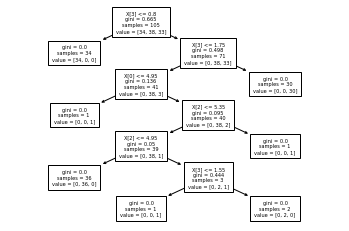

In [9]:
tree.plot_tree(clf, fontsize=5, precision=3)

### Usando o modelo na base de Teste

In [10]:
predict = clf.predict(features_test)

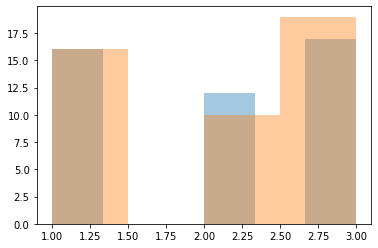

In [11]:
sns.distplot(label_test, bins=6, kde=False)
sns.distplot(predict, bins=4, kde=False)

### Testando a accuracy

In [12]:
print(f'Taxa de acerto do modelo: {round(accuracy(label_test, predict) * 100,2)}%')

Taxa de acerto do modelo: 95.56%
